# Forecasting Retail Sales using Time Series Models.

<b>DESCRIPTION<b>:
    
The objective of this project is to develop a robust time series forecasting model that can accurately predict the unit sales for various items sold in Favorita stores. Favorita is a leading grocery retailer based in Ecuador, and the company's sales data will be used to build the model. The data set contains sales data for thousands of items sold at different stores, making it a challenging and complex problem.

To build an accurate forecasting model, various statistical and machine learning techniques will be used. The data will be preprocessed to ensure that it is clean, consistent, and in the right format for analysis. Exploratory data analysis (EDA) techniques will be employed to gain a deeper understanding of the data and identify any patterns or trends in the sales data.

Time series forecasting models, such as ARIMA, exponential smoothing, and machine learning algorithms, including random forests and gradient boosting, will be used to predict store sales. These models will be trained using historical sales data, and their accuracy will be evaluated using various performance metrics such as root mean square logarithmic error, root mean squared error (RMSE), and mean square error (MSE).

The results obtained from the forecasting models will be analyzed, and insights gained from the analysis will be used to make informed business decisions. The insights could include identifying which products have high demand at different times of the year, which stores perform better than others, and identifying any trends in sales data that could inform marketing and inventory decisions.

Overall, the project aims to build a reliable time series forecasting model that can help Favorita optimize their sales strategies and improve their bottom line.

<b>QUESTIONS ASKED OF THE DATA<b>
    
-Is the train dataset complete (has all the required dates)?

-Which dates have the lowest and highest sales for each year?

-Did the earthquake impact sales?

-Are certain groups of stores selling more products? (Cluster, city, state, type)

-Are sales affected by promotions, oil prices and holidays?

-What analysis can we get from the date and its extractable features?

-What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

Your task is to build a model that more accurately predicts the unit sales for thousands of items.

<b>Hypothesis<b>

The location of Favorita stores has an impact on the sales of specific items, and stores located in certain regions sell more of certain items compared to others. By identifying these regional trends and patterns, Favorita can optimize its store layout, product selection, and marketing strategies to better serve its customers and increase sales.
    
<b>Null Hypothesis(H0)<b>: 

There is no relationship between the location of Favorita stores and the sales of specific items.

<b>Alternative Hypothesis(HA)<b>: 

The location of Favorita stores has an impact on the sales of specific items.


<b>Importation<b>

Here I import the relevant libraries and packages that will be used in the notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from summarytools import dfSummary
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')



<b>DATA LOADING<b>

In [2]:
df_holiday_events=pd.read_csv("C:/Users/User/Documents/ALL THINGS DATA\AZUBI/CAREER ACCELERATOR/LP2-REGRESSION/store-sales-time-series-forecasting/holidays_events.csv")
df_oil=pd.read_csv("C:/Users/User/Documents/ALL THINGS DATA/AZUBI/CAREER ACCELERATOR/LP2-REGRESSION/store-sales-time-series-forecasting/oil.csv")
df_sample_submission=pd.read_csv("C:/Users/User/Documents/ALL THINGS DATA/AZUBI/CAREER ACCELERATOR/LP2-REGRESSION/store-sales-time-series-forecasting/sample_submission.csv")
df_stores=pd.read_csv("C:/Users/User/Documents/ALL THINGS DATA/AZUBI/CAREER ACCELERATOR/LP2-REGRESSION/store-sales-time-series-forecasting/stores.csv")
df_transactions=pd.read_csv("C:/Users/User/Documents/ALL THINGS DATA/AZUBI/CAREER ACCELERATOR/LP2-REGRESSION/store-sales-time-series-forecasting/transactions.csv")
test_set=pd.read_csv("C:/Users/User/Documents/ALL THINGS DATA/AZUBI/CAREER ACCELERATOR/LP2-REGRESSION/store-sales-time-series-forecasting/test.csv")
train_set=pd.read_csv("C:/Users/User/Documents/ALL THINGS DATA/AZUBI/CAREER ACCELERATOR/LP2-REGRESSION/store-sales-time-series-forecasting/train.csv")
pd.set_option('display.max_columns', None)

# EXPLORATORY DATA ANALYSIS-EDA.

<b>INSPECT EACH DATASET INDIVIDUALLY.<b>

<b>HOLIDAY EVENTS DATASET<b>

In [3]:
df_holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
df_holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [5]:
#Convert the date datatype from object to date.
df_holiday_events['date']=pd.to_datetime(df_holiday_events.date)

In [6]:
#Check for duplicate entries.

df_holiday_events.duplicated().value_counts()

False    350
dtype: int64

In [7]:
dfSummary(df_holiday_events,is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,date[datetime64[ns]],"Min: 2012-03-02Max: 2017-12-26Duration: 2,125 days",312 distinct values,,0(0.0%)
2,type[object],1. Holiday2. Event3. Additional4. Transfer5. Bridge6. Work Day,221 (63.1%)56 (16.0%)51 (14.6%)12 (3.4%)5 (1.4%)5 (1.4%),,0(0.0%)
3,locale[object],1. National2. Local3. Regional,174 (49.7%)152 (43.4%)24 (6.9%),,0(0.0%)
4,locale_name[object],1. Ecuador2. Quito3. Riobamba4. Guaranda5. Latacunga6. Ambato7. Guayaquil8. Cuenca9. Ibarra10. Salinas11. other,174 (49.7%)13 (3.7%)12 (3.4%)12 (3.4%)12 (3.4%)12 (3.4%)11 (3.1%)7 (2.0%)7 (2.0%)6 (1.7%)84 (24.0%),,0(0.0%)
5,description[object],1. Carnaval2. Fundacion de Cuenca3. Fundacion de Ibarra4. Fundacion de Quito5. Provincializacion de Santo Dom6. Provincializacion Santa Elena7. Independencia de Guaranda8. Independencia de Latacunga9. Independencia de Ambato10. Fundacion de Quito-111. other,10 (2.9%)7 (2.0%)7 (2.0%)6 (1.7%)6 (1.7%)6 (1.7%)6 (1.7%)6 (1.7%)6 (1.7%)6 (1.7%)284 (81.1%),,0(0.0%)
6,transferred[bool],1. False2. True,338 (96.6%)12 (3.4%),,0(0.0%)


<b>Observations about df_holiday_events DataFrame.<b>

-There are no missing values in each of the columns.

-The date column had an object data type.

-There are total of 12 transferred holidays in the transferred column.
    
-There are no duplicate entries in the dataset.

<b>Feature creation<b>

For ease of analysis further down the line, I decided to create stand-alone columns for day,month and year using the date column.

In [8]:
date = pd.to_datetime(df_holiday_events['date'][0])

In [9]:
df_holiday_events['Year']=date.year
df_holiday_events['Month']=date.month
df_holiday_events['Day Name']=date.day_name()

In [10]:
df_holiday_events.head()

,date,type,locale,locale_name,description,transferred,Year,Month,Day Name
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,2012,3,Friday
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2012,3,Friday
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2012,3,Friday
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2012,3,Friday
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,2012,3,Friday


In [11]:
#We now set the date as the index for the DataFrame

df_holiday_events = df_holiday_events.set_index('date')

In [12]:
df_holiday_events.head()

,type,locale,locale_name,description,transferred,Year,Month,Day Name
date,,,,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,2012,3,Friday
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2012,3,Friday
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2012,3,Friday
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2012,3,Friday
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,2012,3,Friday


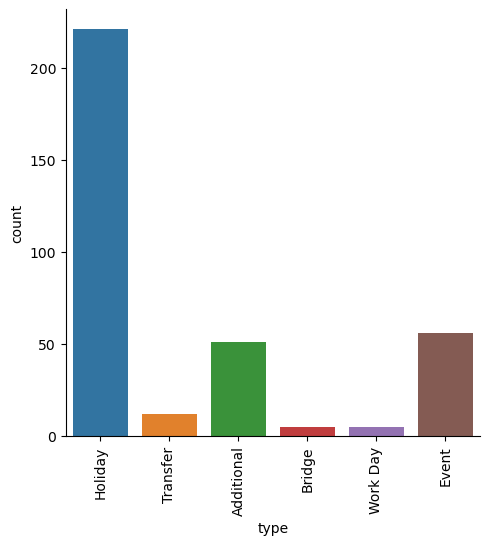

In [13]:
#Inspecting the types of the holidays column

holiday_plot = sns.catplot(data=df_holiday_events, x="type",kind="count")
holiday_plot.ax.set_xticklabels(holiday_plot.ax.get_xticklabels(), rotation=90);

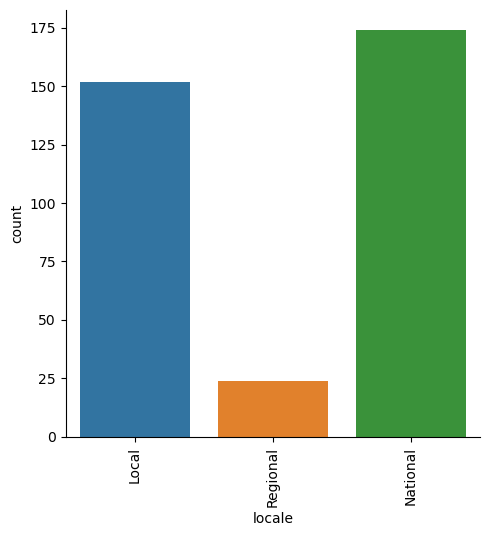

In [14]:
##Visualizing the new data set

holiday_plot = sns.catplot(data=df_holiday_events, x="locale",kind="count")
holiday_plot.ax.set_xticklabels(holiday_plot.ax.get_xticklabels(), rotation=90);


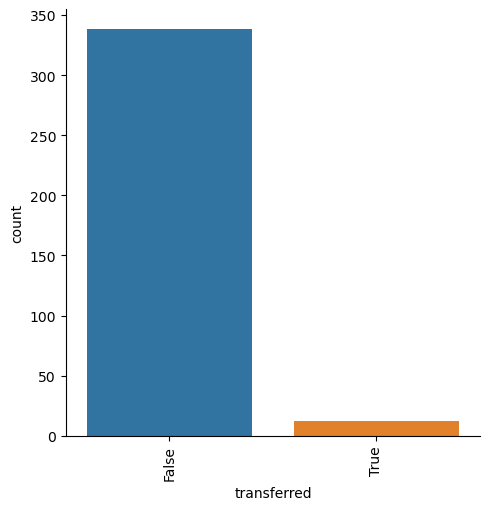

In [15]:
holiday_plot = sns.catplot(data=df_holiday_events, x="transferred",kind="count")
holiday_plot.ax.set_xticklabels(holiday_plot.ax.get_xticklabels(), rotation=90);

<b>OIL DATASET<b>

In [16]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [17]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [18]:
dfSummary(df_oil, is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,date[object],1. 2013-01-012. 2016-02-083. 2016-02-174. 2016-02-165. 2016-02-156. 2016-02-127. 2016-02-118. 2016-02-109. 2016-02-0910. 2016-02-0511. other,"1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1,208 (99.2%)",,0(0.0%)
2,dcoilwtico[float64],Mean (sd) : 67.7 (25.6)min < med < max:26.2 < 53.2 < 110.6IQR (CV) : 49.3 (2.6),998 distinct values,,43(3.5%)


In [19]:
df_oil.duplicated().value_counts()

False    1218
dtype: int64

<b>Observations about df_oil DataFrame<b>

-There are 43 missing values in the dcoilwtico column.

-There are no duplcate entries in the DataFrame.
    
-The date column is an object data type.

In [20]:
#Change the date data type from object to date time

df_oil['date']=pd.to_datetime(df_oil.date)

<b>Feature creation<b>

For ease of analysis further down the line, I decided to create stand-alone columns for day,month and year using the date column.

In [21]:
date = pd.to_datetime(df_oil['date'][0])

In [22]:
df_oil['Year']=date.year
df_oil['Month']=date.month
df_oil['Day Name']=date.day_name()

In [23]:
#We now set the date as the index for the DataFrame

df_oil = df_oil.set_index('date')

In [24]:
df_oil.head()

,dcoilwtico,Year,Month,Day Name
date,,,,
2013-01-01,NaN,2013,1,Tuesday
2013-01-02,93.14,2013,1,Tuesday
2013-01-03,92.97,2013,1,Tuesday
2013-01-04,93.12,2013,1,Tuesday
2013-01-07,93.20,2013,1,Tuesday


<AxesSubplot:xlabel='date'>

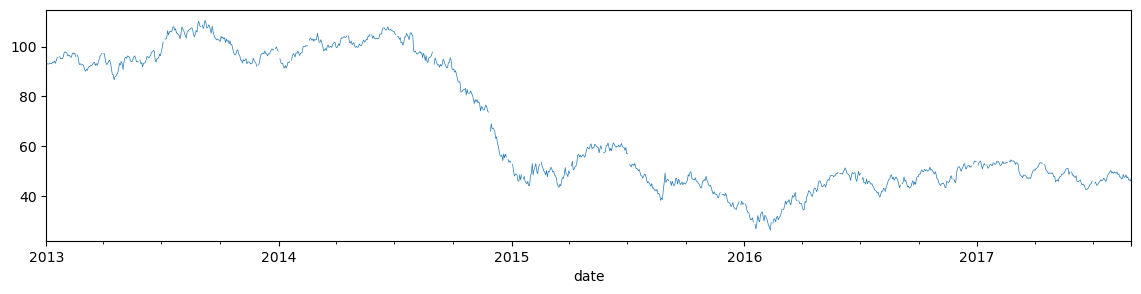

In [25]:
plt.figure(figsize=(14,3))
df_oil['dcoilwtico'].plot(linewidth=0.5)

-There are gaps in the plot that indicates missing oil price values for those points in time. The solution is to extrapolate the price for oil for the relevant dates.

-There is clearly a downward trend in oil prices when viewd across the five (5) yeas under inspection.

-Oil prices in 2013 to mid year 2014 stayed above $80 per barrel.

-The prices started trending downwards from mid 2014 and hit its lowest price at ending of February 2016.

-Price then rose to $50 a barrel in the second quarter of 2016.It has held steady since then.

<b>MISSING VALUES IN OIL DATASET<b>

In [26]:
df_oil["dcoilwtico"]=df_oil['dcoilwtico'].interpolate(method='linear')

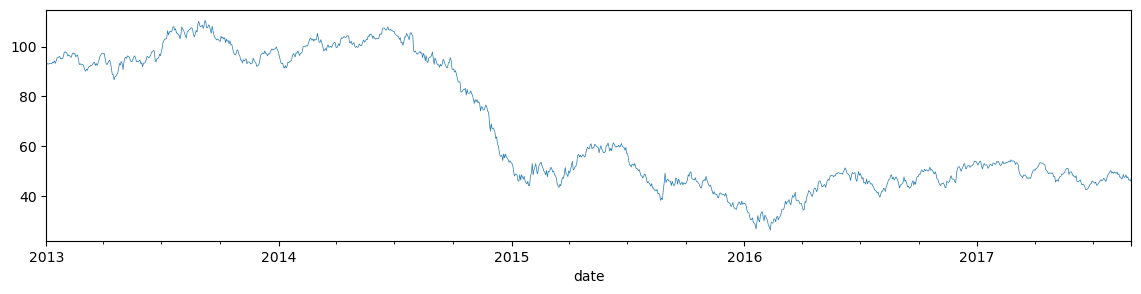

In [27]:
plt.figure(figsize=(14,3))
df_oil['dcoilwtico'].plot(linewidth=0.5);

In [28]:
df_oil.isnull().sum()

dcoilwtico    1
Year          0
Month         0
Day Name      0
dtype: int64

<b>SAMPLE SUBMISSION DATASET<b>

In [29]:
df_sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [30]:
dfSummary(df_sample_submission,is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],1. 0.0,"28,512 (100.0%)",,0(0.0%)
2,sales[float64],nan,nan,nan,0(0.0%)


<B>Observations about the Sample Submission DataFrame.<B>

-There are no missing values in the entire dataset.

<b>Stores Dataset<b>

In [31]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [32]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [33]:
dfSummary(df_stores, is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,store_nbr[int64],1. Quito2. Guayaquil3. Cuenca4. Santo Domingo5. Manta6. Latacunga7. Machala8. Ambato9. Quevedo10. Esmeraldas11. other,18 (33.3%)8 (14.8%)3 (5.6%)3 (5.6%)2 (3.7%)2 (3.7%)2 (3.7%)2 (3.7%)1 (1.9%)1 (1.9%)12 (22.2%),,0(0.0%)
2,city[object],1. Pichincha2. Guayas3. Santo Domingo de los Tsachilas4. Azuay5. Manabi6. Cotopaxi7. Tungurahua8. Los Rios9. El Oro10. Chimborazo11. other,19 (35.2%)11 (20.4%)3 (5.6%)3 (5.6%)3 (5.6%)2 (3.7%)2 (3.7%)2 (3.7%)2 (3.7%)1 (1.9%)6 (11.1%),,0(0.0%)
3,state[object],1. D2. C3. A4. B5. E,18 (33.3%)15 (27.8%)9 (16.7%)8 (14.8%)4 (7.4%),,0(0.0%)
4,type[object],nan,nan,nan,0(0.0%)
5,cluster[int64],nan,nan,nan,0(0.0%)


<b>Observations about the stores dataset<b>

-There are no duplicate entries.

-There are no missing values.

-All columns are in their expected data types.

In [34]:
df_stores.duplicated().value_counts()


False    54
dtype: int64

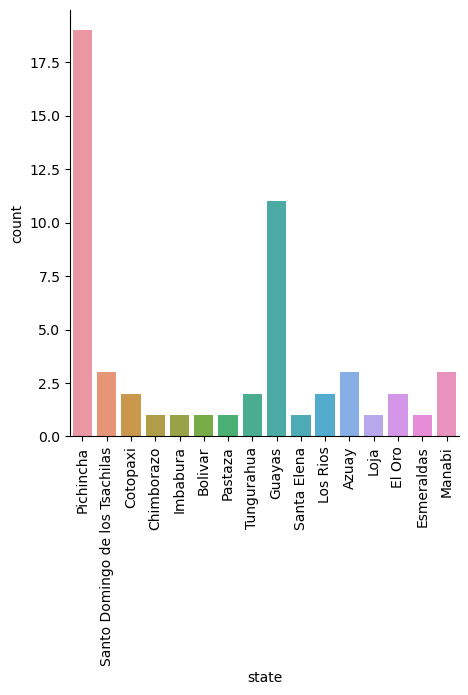

In [35]:
#Visualising the stores data set

store_plot=sns.catplot(data=df_stores,x='state',kind='count',orient='h')
store_plot.ax.set_xticklabels(store_plot.ax.get_xticklabels(), rotation=90);

<b>Observations of the state column<b>

-Pichincha has the highest number of favorita stores.
    
-Guayas has the second highest number of stores.

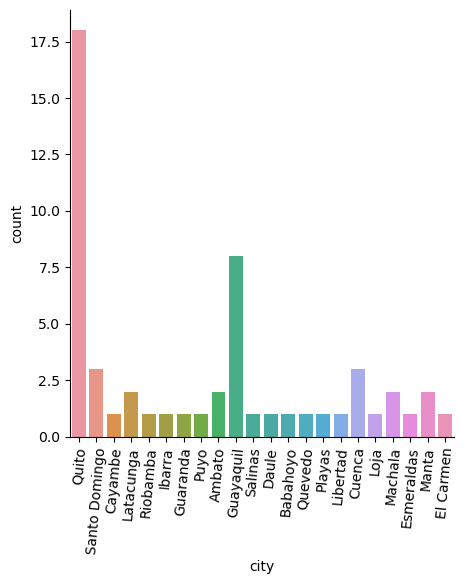

In [37]:
store_plot=sns.catplot(data=df_stores,x='city',kind='count',orient='h')
store_plot.ax.set_xticklabels(store_plot.ax.get_xticklabels(), rotation=85);

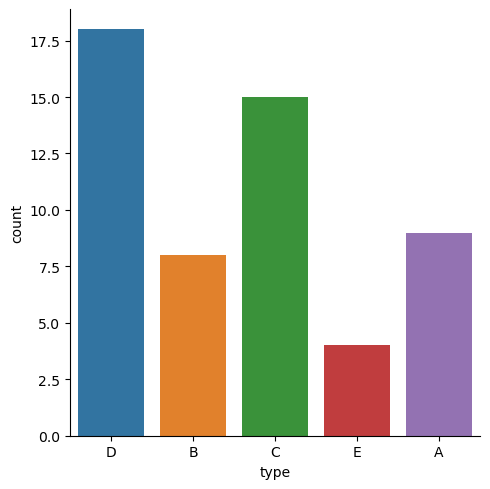

In [38]:
store_plot=sns.catplot(data=df_stores,x='type',kind='count',orient='h')
store_plot.ax.set_xticklabels(store_plot.ax.get_xticklabels());

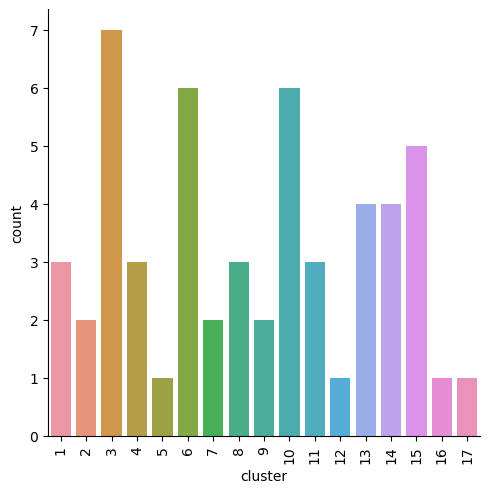

In [39]:
store_plot=sns.catplot(data=df_stores,x='cluster',kind='count',orient='h')
store_plot.ax.set_xticklabels(store_plot.ax.get_xticklabels(), rotation=90);

<b>TRANSACTIONS DATASET<b>

In [40]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [41]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [42]:
dfSummary(df_transactions,is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,date[object],1. 2017-08-152. 2017-06-023. 2017-05-214. 2017-05-225. 2017-05-236. 2017-05-247. 2017-05-258. 2017-05-269. 2017-05-2710. 2017-05-2811. other,"54 (0.1%)54 (0.1%)54 (0.1%)54 (0.1%)54 (0.1%)54 (0.1%)54 (0.1%)54 (0.1%)54 (0.1%)54 (0.1%)82,948 (99.4%)",,0(0.0%)
2,store_nbr[int64],nan,nan,nan,0(0.0%)
3,transactions[int64],nan,nan,nan,0(0.0%)


In [43]:
#Check for duplicate entries
df_transactions.duplicated().value_counts()

False    83488
dtype: int64

<b>Observations about Transactions dataset<b>
    
-There are no duplicate entries.
 
-There are no null values.
    
-The date column is an object data type.

In [44]:
#Convert date from Object to Datetime


df_transactions['date']=pd.to_datetime(df_transactions.date)

<b>Feature Creation<b>
    
For ease of analysis further down the line, I decided to create stand-alone columns for day,month and year using the date column.

In [45]:
date = pd.to_datetime(df_transactions['date'][0])

In [46]:
df_transactions['Year']=date.year
df_transactions['Month']=date.month
df_transactions['Day Name']=date.day_name()

In [47]:
#We now set the date as the index for the DataFrame

df_transactions = df_transactions.set_index('date')

In [48]:
df_transactions.head()

,store_nbr,transactions,Year,Month,Day Name
date,,,,,
2013-01-01,25,770,2013,1,Tuesday
2013-01-02,1,2111,2013,1,Tuesday
2013-01-02,2,2358,2013,1,Tuesday
2013-01-02,3,3487,2013,1,Tuesday
2013-01-02,4,1922,2013,1,Tuesday


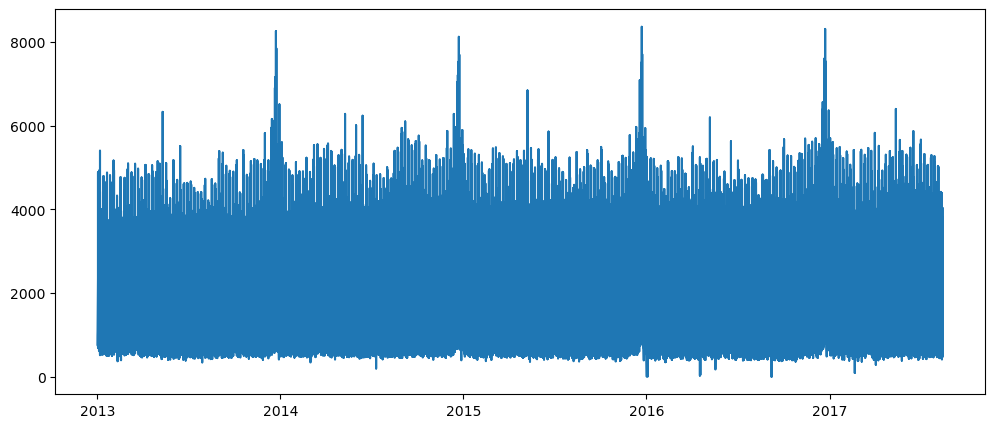

In [49]:
#Visualizing the transactions dataset
plt.figure(figsize=(12,5))
plt.plot(df_transactions.transactions);

-There is seasonality in transactions volumes across the years under review.

-The spike in transactions coincides with the shopping frenzy just before the christmas holidays.


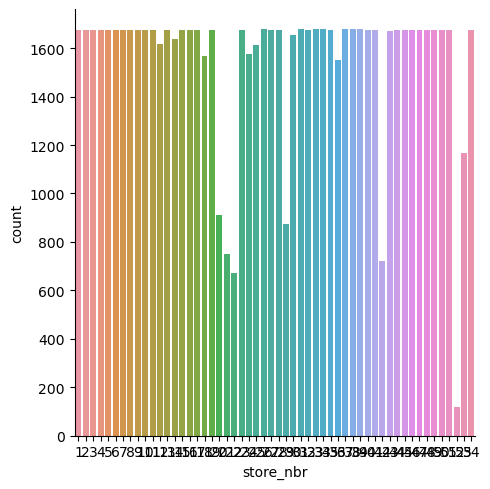

In [50]:
#transaction_plot=sns.catplot(data=df_transactions,x='store_nbr',kind='count',orient='h')
#transaction_plot.ax.set_xticklabels(store_plot.ax.get_xticklabels(), rotation=90)


transaction_plot = sns.catplot(data=df_transactions, x='store_nbr', kind='count', orient='v')
transaction_plot.ax.set_xticklabels(transaction_plot.ax.get_xticklabels());




In [51]:

# Create a barplot
sns.barplot(x=df_transactions['count'], y=df_transactions['store_nbr'])

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Store Number')
plt.title('Number of Transactions per Store')

# Show the plot
plt.show()


KeyError: 'count'

<b>TRAIN DATASET<b>

In [52]:
train_set.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [53]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [54]:
dfSummary(train_set,is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],1. 2013-01-012. 2016-01-153. 2016-02-084. 2016-02-075. 2016-02-066. 2016-02-057. 2016-02-048. 2016-02-039. 2016-02-0210. 2016-02-0111. other,"1,782 (0.1%)1,782 (0.1%)1,782 (0.1%)1,782 (0.1%)1,782 (0.1%)1,782 (0.1%)1,782 (0.1%)1,782 (0.1%)1,782 (0.1%)1,782 (0.1%)2,983,068 (99.4%)",,0(0.0%)
2,date[object],1. AUTOMOTIVE2. HOME APPLIANCES3. SCHOOL AND OFFICE SUPPLIES4. PRODUCE5. PREPARED FOODS6. POULTRY7. PLAYERS AND ELECTRONICS8. PET SUPPLIES9. PERSONAL CARE10. MEATS11. other,"90,936 (3.0%)90,936 (3.0%)90,936 (3.0%)90,936 (3.0%)90,936 (3.0%)90,936 (3.0%)90,936 (3.0%)90,936 (3.0%)90,936 (3.0%)90,936 (3.0%)2,091,528 (69.7%)",,0(0.0%)
3,store_nbr[int64],Mean (sd) : 357.8 (1102.0)min < med < max:0.0 < 11.0 < 124717.0IQR (CV) : 195.8 (0.3),"379,610 distinct values",,0(0.0%)
4,family[object],nan,nan,nan,0(0.0%)
5,sales[float64],nan,nan,nan,0(0.0%)
6,onpromotion[int64],nan,nan,nan,0(0.0%)


<b>Observations about the train dataframe<b>

-There are no missing values in the dataFrame.

-The date column is an object data type.
    
-The family column are object data types this will not be accepted by the model.

In [55]:
#Convert date from object to date time.

train_set['date']=pd.to_datetime(train_set.date)

In [56]:
train_set['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

<Figure size 800x600 with 0 Axes>

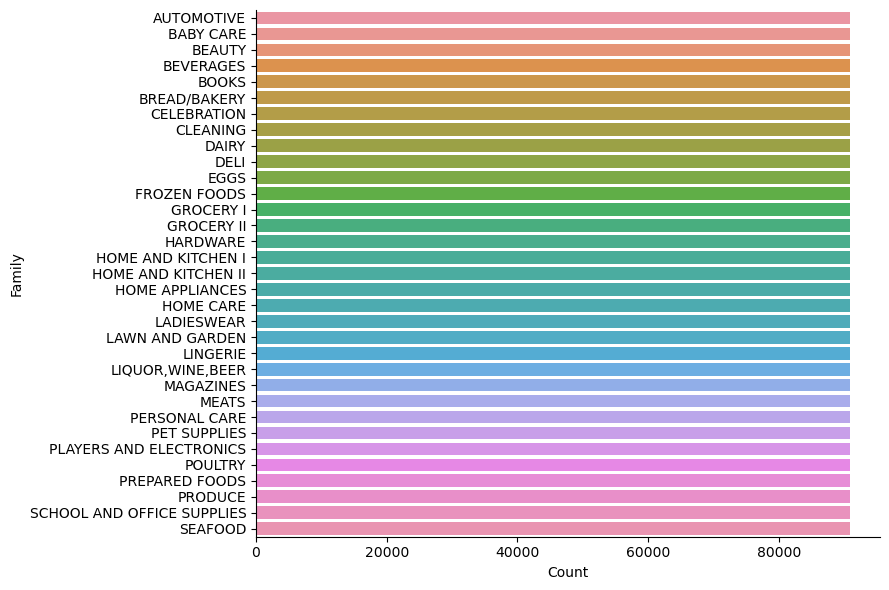

In [57]:
#train_plot = sns.catplot(data=train_set, x='family', kind='count', orient='v')
#train_plot.ax.set_xticklabels(train_plot.ax.get_xticklabels());

plt.figure(figsize=(8,6))
train_plot = sns.catplot(data=train_set, y='family', kind='count', orient='h', height=6, aspect=1.5)
train_plot.ax.set_xlabel('Count')
train_plot.ax.set_ylabel('Family');


<b>Observation about the Family column<b>

-Alot of the family groupings are in the food category, these have to be regrouped for easier analyis.

-There is an number of entries for all product families in the train dataset.

<AxesSubplot:xlabel='date', ylabel='sales'>

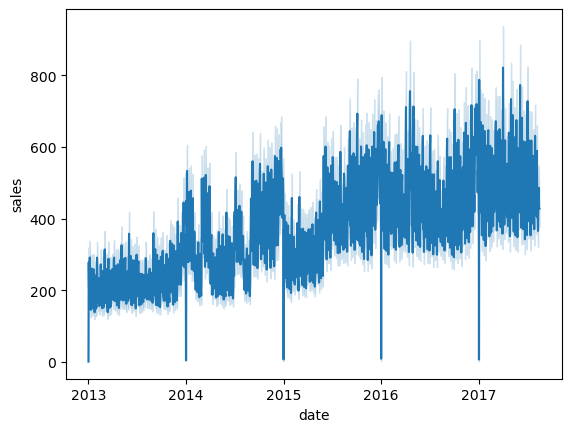

In [59]:
sns.lineplot(data=train_set, x='date', y='sales')


<b>Observation from the train_set transaction plot.<b>

-There is an upward trend in the transactions data.

-The transactions peak at the end of the year, then drops off. 

-The transactions then starts to rise gradually then peaks again at end of year before repeating the cycle. 

-This indicates seasonality in the transactions data.

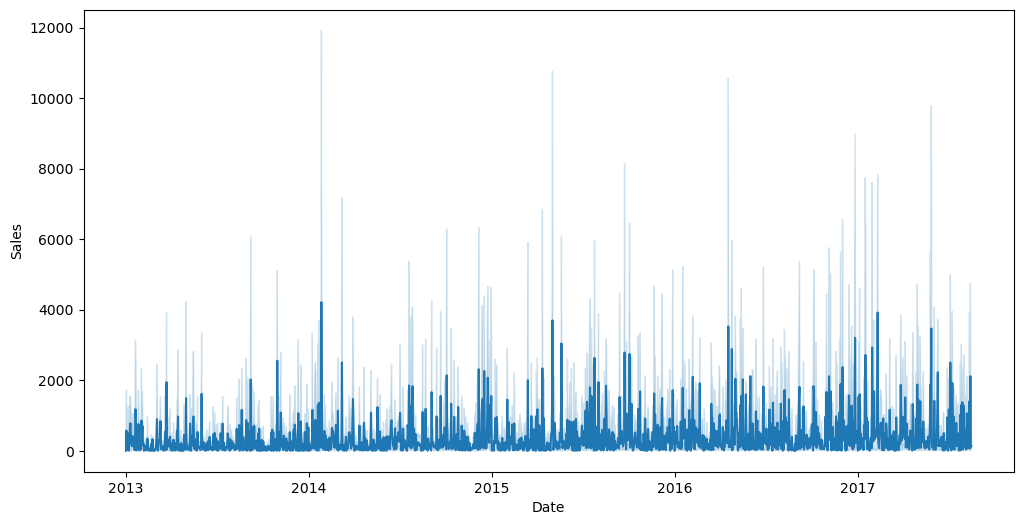

In [62]:
# Sample 10,000 rows from the train_set DataFrame
train_sample = train_set.sample(n=10000, random_state=42)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12,6))

# Create the line plot
sns.lineplot(data=train_sample, x='date', y='sales', ax=ax)

# Set the x and y axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

# Show the plot
plt.show()



<Figure size 800x600 with 0 Axes>

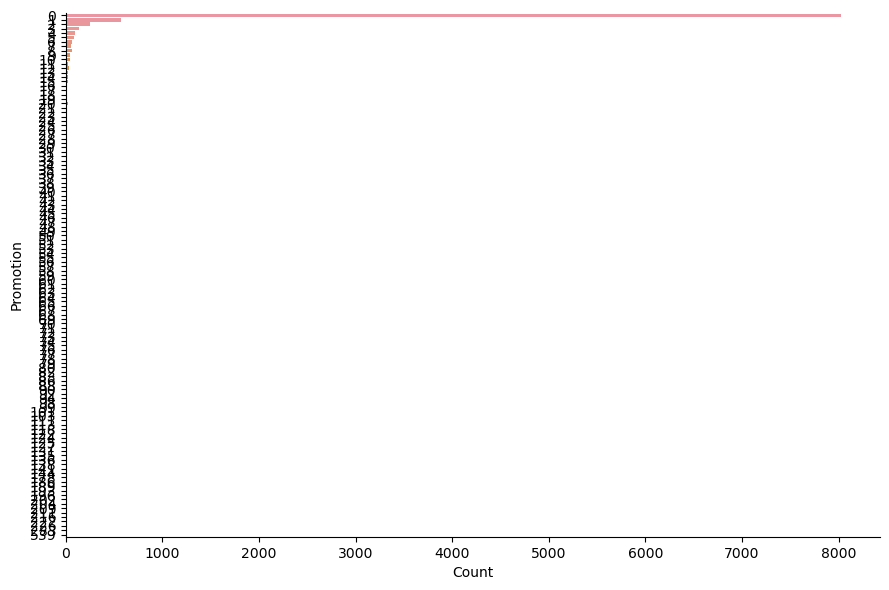

In [63]:
plt.figure(figsize=(8,6))
train_plot = sns.catplot(data=train_sample, y='onpromotion', kind='count', orient='h', height=6, aspect=1.5)
train_plot.ax.set_xlabel('Count')
train_plot.ax.set_ylabel('Promotion');

# ANSWERING THE QUESTIONS PUT TO THE DATA